<a href="https://colab.research.google.com/github/IorioDiego/SOA-HPC/blob/master/Cuaderno_2_Miercoles_Grupo11_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introducción**


En este ejercicio optamos por aplicar bibliotecas de python para tratar con gran volumen de datos. En el mismo haremos concatenación de imágenes. Conociendo que las imágenes se representan en código en forma de matrices y cuyo volumen de datos puede ser considerado grande y tedioso de trabajar en forma secuencial nos pareció que era una buena idea de aplicar threads de GPU.

**2. Armado del ambiente**

In [ ]:
#@title ## 2.1 Parámetros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen1 = "https://github.com/IorioDiego/SOA-HPC/blob/master/HPC/imagenes/Unlam.jpg?raw=true" #@param {type:"string"}
url_imagen2 = "https://github.com/IorioDiego/SOA-HPC/blob/master/HPC/imagenes/unlamDia.jpg?raw=true" #@param {type:"string"}

!wget {url_imagen1} -O imagen1.jpg
!wget {url_imagen2} -O imagen2.jpg

--2021-11-19 23:32:59--  https://github.com/IorioDiego/SOA-HPC/blob/master/HPC/imagenes/Unlam.jpg?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IorioDiego/SOA-HPC/raw/master/HPC/imagenes/Unlam.jpg [following]
--2021-11-19 23:32:59--  https://github.com/IorioDiego/SOA-HPC/raw/master/HPC/imagenes/Unlam.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IorioDiego/SOA-HPC/master/HPC/imagenes/Unlam.jpg [following]
--2021-11-19 23:33:00--  https://raw.githubusercontent.com/IorioDiego/SOA-HPC/master/HPC/imagenes/Unlam.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connecte

**3. Desarrollo**

En el siguiente ejercicio planteado por nosotros e investigando acerca de los módulos propuestos encontramos útil e interesante realizar el informe acerca de funcionalidades que nos provee la biblioteca OpenCV. A partir de este analisis pensamos en la concatenación de imágenes como objeto de estudio. Basados en esto, realizamos la concatenación de 2 imágenes en forma horizontal. Planteamos este ejercicio porque nos pareció una buena forma de aplicar Threads de GPU para trabajar con un gran volumen de datos (imágenes de tamaño 1280 x 720).  

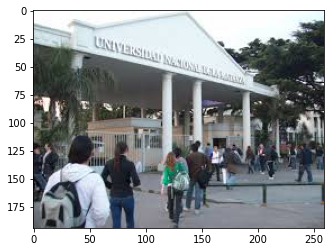

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pyplot as plt
import numpy
from PIL import Image

img_nombre1 = 'imagen1.jpg'
img_nombre2 = 'imagen2.jpg'

imagenNormal1 = Image.open(img_nombre1)
imagenNormal2 = Image.open(img_nombre2)

##----------------------------------Muestro la imagen 1: 
# Convierto la imagen 1 comprimida en JPEG/PNG a array.
img_pic1_cpu = numpy.asarray(imagenNormal1)
img_pic1_cpu = img_pic1_cpu.astype( numpy.int32() )

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img_picR1_cpu = numpy.empty_like( img_pic1_cpu)
imgplot1 = plt.imshow( img_pic1_cpu )

##-----------------------------------------------------------------------------



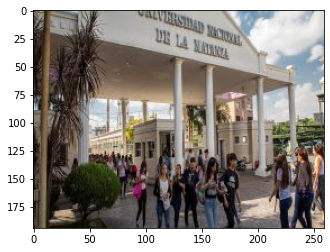

In [ ]:
# Convierto la imagen 2 comprimida en JPEG/PNG a array.
img_pic2_cpu = numpy.asarray(imagenNormal2)
img_pic2_cpu = img_pic2_cpu.astype( numpy.int32() )

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img_picR2_cpu = numpy.empty_like( img_pic2_cpu)
imgplot2 = plt.imshow( img_pic2_cpu )

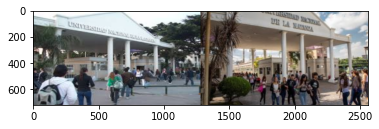

In [ ]:
##Uno las imagenes: 
imagen1 = cv.imread(img_nombre1)
imagen2 = cv.imread(img_nombre2)
imagen1_resized = cv.resize(imagen1,  (1280, 720))
imagen2_resized = cv.resize(imagen2,  (1280, 720))


#Las transformo a RGB
imagen1_resized = cv.cvtColor(imagen1_resized, cv.COLOR_BGR2RGB)
imagen2_resized = cv.cvtColor(imagen2_resized, cv.COLOR_BGR2RGB)


# Concateno horizontalmente: 
concat_h1 = cv.hconcat([imagen1_resized, imagen2_resized])

# Convierto la imagen CONCATENADA comprimida en JPEG/PNG a array.
img_pic3_cpu = numpy.asarray(concat_h1)
img_pic3_cpu = img_pic3_cpu.astype( numpy.int32() )

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img_picR3_cpu = numpy.empty_like( img_pic3_cpu)
imgplot3 = plt.imshow( img_pic3_cpu )




**Dirección del link:** 
https://github.com/IorioDiego/SOA-HPC


**Conclusión**

Luego de la investigación realizada nos encontramos con bibliotecas de Python que nos facilitan la implementación de los GPU Cores. Esto supone una facilidad al programador para trabajar con un gran volumen de datos además de abstraerse de la implementación del Kernel de GPU y su lógica de procesamiento. 

De esta experiencia nos llevamos conocimiento acerca de la facilidad de implementación de bibliotecas Python para proyectos personales así como también la flexibilidad de trabajar en un ambiente como lo es Google Colab. 

**Bibliografía**

[1] IMAGE PROCESSING IN PYTHON [IMAGE PROCESSING](https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=rVQ72cRFIMtP)

[2] RESIZE DE IMÁGENES EN PYTHON [Resizing](https://likegeeks.com/es/procesar-de-imagenes-en-python/) 

[3] TRANSFORMAR IMÁGEN A RGB [RGB](https://omes-va.com/rgb/)

[4] OPEN CV CONCAT [CONCAT](https://hetpro-store.com/TUTORIALES/opencv-cvtcolor/)
